In [8]:
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords


In [22]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import os
import matplotlib.pyplot as plt
import math



In [10]:
shapes = np.empty([4, 68, 2], dtype=int)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"C:\Users\Noa\Downloads\shape_predictor_68_face_landmarks.dat")
directory = r'C:/Users/Noa/AppData/Local/Programs/Python/Python38/Scripts/face_magnified_color11.mp4_frames'
for j in range(0,4):
    img = os.listdir(directory)[j]
    image = cv2.imread(r'C:/Users/Noa/AppData/Local/Programs/Python/Python38/Scripts/face_magnified_color11.mp4_frames/' + img)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale im
    rects = detector(gray, 1)
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        shapes[j] = shape
        
        #
        #for (x, y) in shape:
        #print(x,y)
    #cv2.circle(image, (62, 222), 1, (0, 0, 255), -1)
    #cv2.circle(image, (60, 265), 1, (0, 0, 255), -1)
    #cv2.circle(image, (200, 501), 1, (0, 0, 255), -1)
    #cv2.circle(image, (121, 181), 1, (0, 0, 255), -1)
#cv2.imshow("Output", image)
#cv2.waitKey(0)

    
    
    
    
    


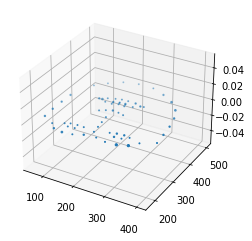

In [24]:
x_axis = np.empty(68, dtype = int)
y_axis = np.empty(68, dtype = int)
z_axis = np.empty(68, dtype = int)
for i in range(0, 68):
    x_axis[i] = shapes[0][i][0]
    y_axis[i] = shapes[0][i][1]
    p1 = [shapes[0][i][0],shapes[0][i][1]]
    p2 = [shapes[3][i][0],shapes[3][i][1]]
    distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    z_axis[i] = distance

    
    
fig = plt.figure()
ax = plt.axes(projection = '3d')
plt.scatter(x_axis, y_axis, z_axis)
plt.show()  

 
